### House predictions with linear regression

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from skimpy import skim
import utils

In [21]:
# Load the data using pandas
data = pd.read_csv('Hyderabad.csv')
data

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,Nacharam,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,Manikonda,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,Madhapur,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,Hitech City,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [22]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2518   │ │ int64       │ 39    │                                                          │
│ │ Number of columns │ 40     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column       ┃ NA ┃ NA % ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50     ┃ p75      ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Price        │  0 │    0 │ 9818000 │ 8777000 │ 2000000 │ 4760000 │ 7754000 │ 10900000 │ 165000000 │   █    │  │
│ │ Area         │  0 │    0 │    1645 │   746.3 │     500 │    1160 │    1500 │     1829 │      9400 │   █▁   │  │
│ │ No. of       │  0 │    0 │   2.624 │  0.6873 │       1 │       2 │       3 │        3 │         8 │  ▇█▁   │  │
│ │ Bedrooms     │    │      │         │         │         │         │         │          │           │        │  │
│ │ Resale       │  0 │    0 │  0.2276 │  0.4193 │       0 │       0 │       0 │        0 │         1 │ █    ▂ │  │
│ │ MaintenanceS │  0 │    0 │  0.4126 │   1.626 │       0 │       0 │       0 │        0 │         9 │   █    │  │
│ │ taff         │    │      │         │         │         │         │         │          │           │        │  │
│ │ Gymnasium    │  0 │    0 │  0.7399 │   1.611 │       0 │       0 │       0 │        1 │         9 │   █    │  │
│ │ SwimmingPool │  0 │    0 │  0.7097 │   1.615 │       0 │       0 │       0 │        1 │         9 │   █    │  │
│ │ LandscapedGa │  0 │    0 │  0.6191 │   1.624 │       0 │       0 │       0 │        1 │         9 │   █    │  │
│ │ rdens        │    │      │         │         │         │         │         │          │           │        │  │
│ │ JoggingTrack │  0 │    0 │    0.56 │   1.628 │       0 │       0 │       0 │        1 │         9 │   █    │  │
│ │ RainWaterHar │  0 │    0 │  0.6064 │   1.625 │       0 │       0 │       0 │        1 │         9 │   █    │  │
│ │ vesting      │    │      │         │         │         │         │         │          │           │        │  │
│ │ IndoorGames  │  0 │    0 │  0.5806 │   1.627 │       0 │       0 │       0 │        1 │         9 │   █    │  │
│ │ ShoppingMall │  0 │    0 │  0.3662 │   1.623 │       0 │       0 │       0 │        0 │         9 │   █    │  │
│ │ Intercom     │  0 │    0 │  0.6791 │   1.619 │       0 │       0 │       0 │        1 │         9 │   █    │  │
│ │ SportsFacili │  0 │    0 │  0.5536 │   1.628 │       0 │       0 │       0 │        1 │         9 │   █    │  │
│ │ ty           │    │      │         │         │         │         │         │          │           │        │  │
│ │ ATM          │  0 │    0 │  0.4218 │   1.627 │       0 │       0 │       0 │        0 │         9 │   █    │  │
│ │ ClubHouse    │  0 │    0 │  0.7117 │   1.615 │       0 │       0 │       0 │        1 │         9 │   █    │  │
│ │ School       │  0 │    0 │  0.3407 │   1.621 │       0 │       0 │       0 │        0 │         9 │   █    │  │
│ │ 24X7Security │  0 │    0 │  0.7065 │   1.616 │      

In [23]:
data["Location"] = data["Location"].astype('category')
data["Location"] = data["Location"].cat.codes
data

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,162,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,85,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,132,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,9,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,118,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,150,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,132,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,124,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,85,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


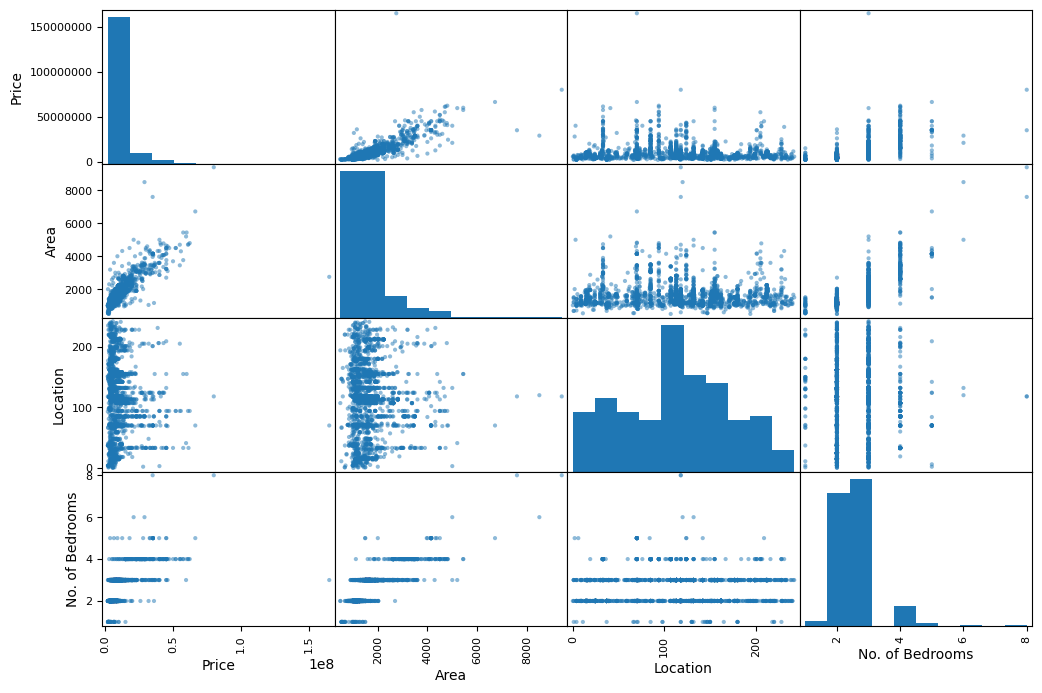

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["Price", "Area", "Location",
              "No. of Bedrooms"]
scatter_matrix(data[attributes], figsize=(12, 8))
#save_fig("scatter_matrix_plot")  # extra code
plt.show()

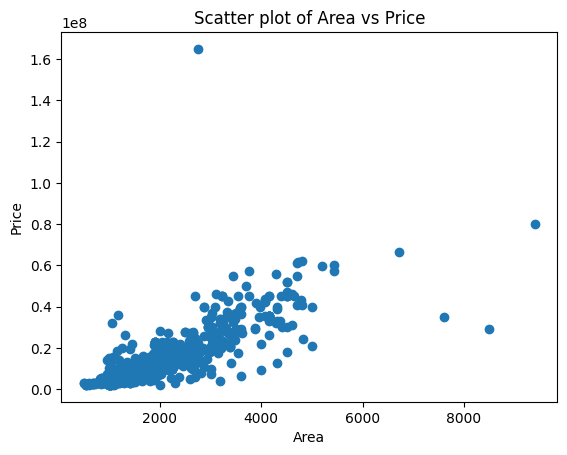

In [25]:
plt.scatter(data['Area'], data['Price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter plot of Area vs Price')
plt.show()

In [26]:
# Scatter plot using Plotly
fig = px.scatter(data, x='Area', y='Price', title='Scatter plot of Area vs Price')
fig.update_layout(xaxis_title='Area', yaxis_title='Price')
fig.show()

### Building a model that uses 1 feature and 1 target

In [27]:
# Prepare the data for scikit-learn
X = data[['Area']].values  # Feature(s)
y = data['Price'].values   # Target

In [28]:
# Create and train the linear regression model
simple_model = LinearRegression()
simple_model.fit(X, y)

LinearRegression()

In [29]:
# Get the coefficients
m = simple_model.coef_[0]  # Slope
b = simple_model.intercept_  # Intercept
print("slope:", m)
print("y-intercept:", b)

slope: 9753.94060818404
y-intercept: -6222669.083283702


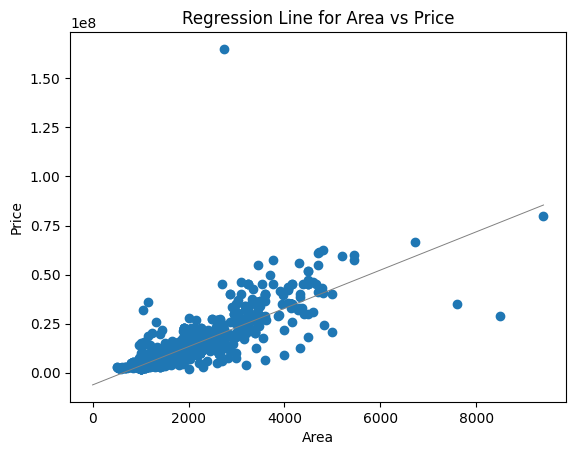

In [30]:
# Plot the regression line
plt.scatter(data['Area'], data['Price'])
utils.draw_line(m, b, starting=0, ending=max(data['Area']))
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Regression Line for Area vs Price')
plt.show()

In [31]:
# Plot the regression line using Plotly
fig = px.scatter(data, x='Area', y='Price', title='Regression Line for Area vs Price')
line_x = np.linspace(0, max(data['Area']), 100)
line_y = m * line_x + b
fig.add_trace(go.Scatter(x=line_x, y=line_y, mode='lines', name='Regression Line'))
fig.update_layout(xaxis_title='Area', yaxis_title='Price')
fig.show()

### Building a model that uses 2 features and 1 target

In [32]:
trained_features = ['Area', 'No. of Bedrooms']
X_all = data[trained_features]
X_all

,Area,No. of Bedrooms
0,1340,2
1,3498,4
2,1318,2
3,1295,3
4,1145,2
...,...,...
2513,1460,2
2514,1314,2
2515,2625,3
2516,2050,3


In [33]:
y_all = data['Price']

In [34]:
model = LinearRegression()
model.fit(X_all, y_all)

LinearRegression()

In [35]:
# Predict with fewer features (e.g., only 'Area' and 'No. of Bedrooms')
new_data = pd.DataFrame({'Area': [1200], 'No. of Bedrooms': [3]})

In [36]:
new_data

,Area,No. of Bedrooms
0,1200,3


In [37]:
# Make predictions
predicted_price = model.predict(new_data)
print("Predicted Price:", predicted_price)

Predicted Price: [4421776.17871872]


In [38]:
# Step 5: Plot with Plotly
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=data['Area'], y=data['No. of Bedrooms'], z=data['Price'],
                           mode='markers',
                           marker=dict(size=5, color='blue', opacity=0.8),
                           name='Actual Data'))
x1_grid, x2_grid = np.meshgrid(np.linspace(data['Area'].min(), data['Area'].max(), 30),
                               np.linspace(data['No. of Bedrooms'].min(), data['No. of Bedrooms'].max(), 30))
y_pred_grid = model.intercept_ + model.coef_[0] * x1_grid + model.coef_[1] * x2_grid
fig.add_trace(go.Surface(x=x1_grid, y=x2_grid, z=y_pred_grid,
                         colorscale=[[0, 'orange'], [1, 'orange']],
                         opacity=0.5, showscale=False, name='Regression Plane'))
fig.update_layout(scene=dict(
                    xaxis_title='X1',
                    yaxis_title='X2',
                    zaxis_title='Y',
                    camera=dict(eye=dict(x=1.4, y=1.4, z=0.8))
                ),
                title='Linear Regression Plane (Plotly)',
                margin=dict(l=0, r=0, b=0, t=40))
fig.show()

### Building a model that uses all the features

In [39]:
# Prepare the data for multiple linear regression
X_all = data.drop(columns=['Price']).values  # All features except the target
y_all = data['Price'].values                 # Target

In [40]:
X_all

array([[1340,  162,    2, ...,    0,    0,    0],
       [3498,   85,    4, ...,    0,    0,    0],
       [1318,  132,    2, ...,    0,    0,    0],
       ...,
       [2625,  124,    3, ...,    9,    9,    9],
       [2050,   85,    3, ...,    9,    9,    9],
       [1805,  158,    3, ...,    9,    9,    9]], shape=(2518, 39))

In [41]:
# Create and train the model
model = LinearRegression()
model.fit(X_all, y_all)

LinearRegression()

In [42]:
# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [   10473.70662675    -8278.77364742 -1585345.83155997  1474315.24496086
 -1225961.21386831 -1051608.87039685   662616.29014316   938868.93050579
  -314539.59912328  -563399.35383919  1073868.68345432   383870.30913708
    15371.73314443  -613044.75142086   277952.03783101   538121.45414087
 -1240172.1792701   -869035.98931714   515031.73568163   598805.02744957
  -123882.03904958  1043643.52830737   317644.58040247   400935.44959721
   -27466.1673474    664878.32557277  1165810.89686687   422248.61394574
   291069.74426282  -277168.28864624   534811.4173037    -23075.344564
 -1696127.5156708  -2180510.49039474  1332489.08006174   280085.92686779
 -1009056.56756322  -560498.15620853   230948.00194735]
Intercept: -3059235.4152794126


In [43]:
# Evaluate the model
predictions = model.predict(X_all)
mse = mean_squared_error(y_all, predictions)
mabs = mean_absolute_error(y_all, predictions)  # Mean Absolute Error
print("Mean Absolute Error:", mabs)
print("Mean Squared Error:", mse)

Mean Absolute Error: 2226457.679991706
Mean Squared Error: 22264066865737.855


### Use Random Forest Algorithm

In [44]:
rforest_model = RandomForestRegressor(random_state=42)

In [45]:
rforest_model.fit(X_all, y_all)

RandomForestRegressor(random_state=42)

In [46]:
predictions_rforest = rforest_model.predict(X_all)
mabs = mean_absolute_error(y_all, predictions_rforest)  # Mean Absolute Error


In [47]:
print("Mean Absolute Error:", mabs)


Mean Absolute Error: 581627.2135406518
